In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import numpy as np
if os.name != 'posix':
    sys.path.append('E:\\flight-muscles\\src')
    sys.path.append('E:\\flight-muscles\\packages')
import arenaclouds as acld
import pylab as plb

/media/analysis-code/flight-muscles/packages/transformations.py:1888: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


In [3]:
reload(acld)
from scipy import io
frame_rate = 50.0 
acld.display_shape = (96,32)
deg_per_pix = 360/acld.display_shape[0]
translation_velocity = 0.3 #2.25*frame_rate
#equator_pole = deg2rad(90)
forward_trans_pole = np.deg2rad(90)
backward_trans_pole = np.deg2rad(270)
upward_trans_pole = np.deg2rad(90)
downward_trans_pole = np.deg2rad(270)
bit_depth = 3
step_duration = 3
static_duration = 10
step_frames = step_duration*frame_rate
static_frames = static_duration*frame_rate
base_angular_velocity = (2*np.pi)/4 #1/4 rev/sec

##################yaw
mv_dict = dict()
poles = [(pole_deg,deg2rad(pole_deg)) for pole_deg in range(0,360,30)]
for i in [1]:
    for rep in range(1):
        for p_deg,p_rad in poles:
            roll_imgs = acld.make_spin_pattern_equator(p_rad,
                                        base_angular_velocity*i,
                                        frame_rate,
                                        max_sensory_radius = 3.0,
                                        star_density = 8)
            roll_imgs = acld.adjust_depth(roll_imgs)
            roll_imgs = roll_imgs[:,:,:-1]
            #acld.play_pattern(roll_imgs)
            roll_imgs = roll_imgs[:,:,:,np.newaxis]
            print p_deg
            mv_dict[p_deg] = roll_imgs
            #io.savemat('./stimulus_data/step_ptch_roll_%03d_v%s_rep%s'%(p_deg,i,rep),{'imgs':roll_imgs})
            #print ('./stimulus_data/step_ptch_roll_%03d_v%s_rep%s'%(p_deg,i,rep))
            #io.savemat('./stimulus_data/step_roll_%s_v%s_rep%s'%(p_deg,i,rep),{'imgs':roll_imgs})

0
30
60
90
120
150
180
210
240
270
300
330


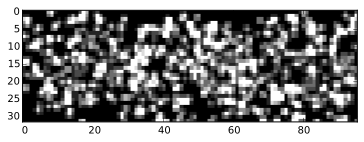

In [4]:
img_ref = imshow(squeeze(roll_imgs[:,:,2]),interpolation = 'nearest',cmap = cm.gray,vmin =0,vmax = 7)

0
30
60
90
120
150
180
210
240
270
300
330


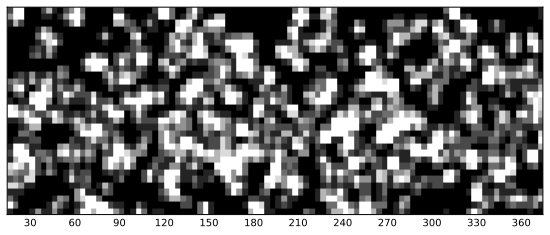

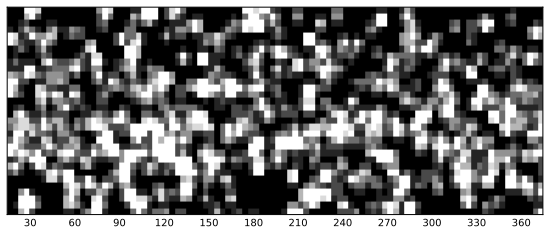

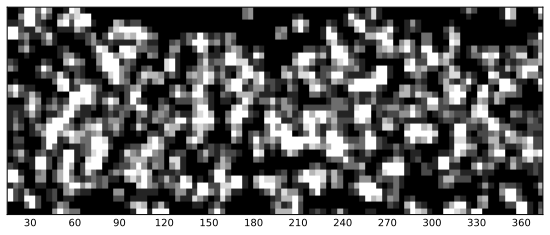

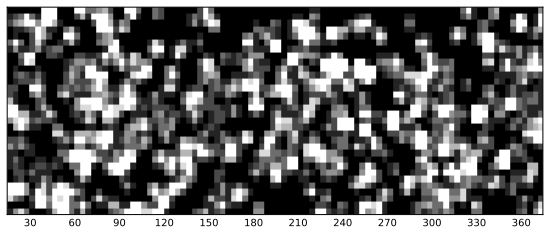

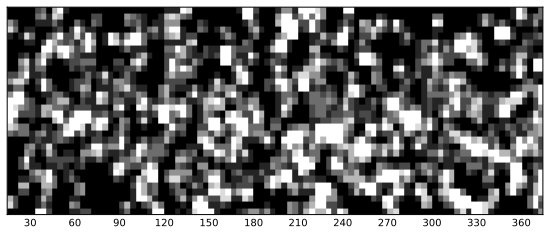

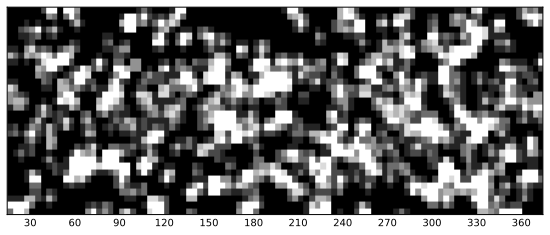

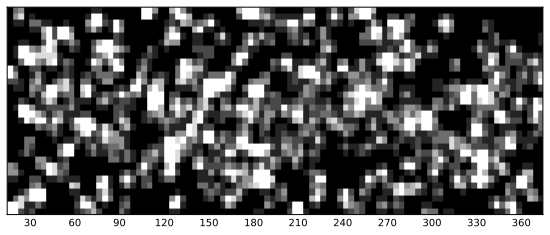

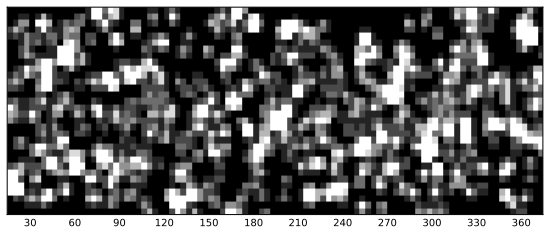

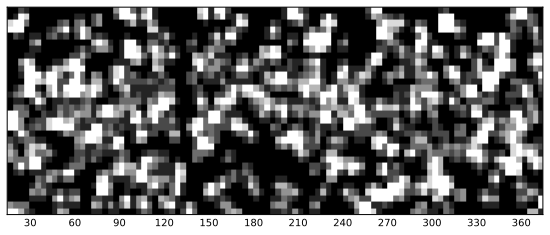

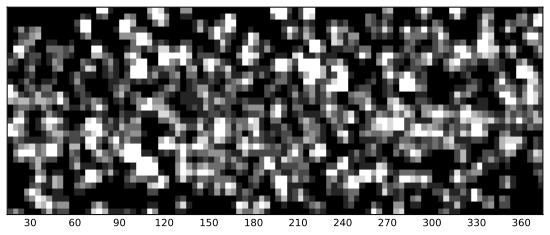

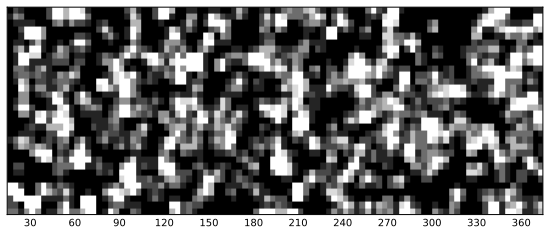

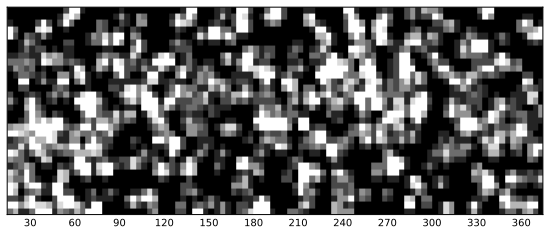

In [56]:

for pole in range(0,360,30):
    roll_imgs = mv_dict[pole]
    fig = figure(figsize = (9.6,3.6))
    img_ref = imshow(squeeze(roll_imgs[:,:,0]),interpolation = 'nearest',aspect='auto',
                     cmap = cm.gray,vmin =0,vmax = 7,extent = [0+15,360+15,0,36])

    gca().tick_params(which  = 'both',
                      tick1On=False,
                      tick2On=False,
                      labelleft = False)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator   = MultipleLocator(30)
    majorFormatter = FormatStrFormatter('%d')
    #minorLocator   = MultipleLocator(5)
    gca().xaxis.set_major_locator(majorLocator)
    gca().xaxis.set_major_formatter(majorFormatter)

    pos = 0
    t0 = 0

    frames = np.arange(0,17,1/33.0)
    lookup = mod((frames*frame_rate),shape(roll_imgs)[2]).astype(int)
    lookup *= ((frames > 7) & (frames <10))
    lookup[(frames>=10)] = lookup[(frames < 10)][-1]

    fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
    #lookup = hstack((zeros(int(7/move_period)),ones(int(3/move_period)),zeros(int(7/move_period))))

    def update_fig(t):
        #print t
        pos = lookup[where(frames<t)[0][-1]]
        #print (t,pos)#where(frames<t)[0][-1]
        frame = np.squeeze(roll_imgs[:,:,pos])
        img_ref.set_data(frame)

    from matplotlib.animation import FFMpegWriter 
    Writer = FFMpegWriter 
    import matplotlib.animation as animation
    writer = Writer( metadata=dict(artist='Thad Lindsay'), bitrate=3600,fps = 33)
    ani = animation.FuncAnimation(fig, update_fig, frames=frames[1:], blit=False)
    print pole
    ani.save('azmuth_%s.mp4'%(pole), writer=writer)

In [58]:
reload(acld)
from scipy import io
frame_rate = 60.0 
acld.display_shape = (96,32)
deg_per_pix = 360/acld.display_shape[0]
translation_velocity = 0.3 #2.25*frame_rate
#equator_pole = deg2rad(90)
forward_trans_pole = np.deg2rad(90)
backward_trans_pole = np.deg2rad(270)
upward_trans_pole = np.deg2rad(90)
downward_trans_pole = np.deg2rad(270)
bit_depth = 3
step_duration = 3
static_duration = 10
step_frames = step_duration*frame_rate
static_frames = static_duration*frame_rate
base_angular_velocity = (2*np.pi)/4 #1/4 rev/sec
for i in [1]:
    for rep in range(1):
        #translation forward
        trans_imgs_for = acld.make_translation_pattern(forward_trans_pole,
                                 0.1,
                                 frame_rate,
                                 epoch_duration=6.0,
                                 max_sensory_radius = 3.0,
                                 star_density = 8)
        trans_imgs_for = acld.adjust_depth(trans_imgs_for)
        #acld.play_pattern(trans_imgs_for)
        
        #translation backward
        trans_imgs_back = acld.make_translation_pattern(backward_trans_pole,
                                     0.1,
                                     frame_rate,
                                     epoch_duration=6.0,
                                     max_sensory_radius = 3.0,
                                     star_density = 8)
        trans_imgs_back = acld.adjust_depth(trans_imgs_back)
        #acld.play_pattern(trans_imgs_back)

        #translation upward
        trans_imgs_up = acld.make_translation_pattern_coromeridian(upward_trans_pole,
                                     0.1,
                                     frame_rate,
                                     epoch_duration=6.0,
                                     max_sensory_radius = 3.0,
                                     star_density = 8)
        trans_imgs_up = acld.adjust_depth(trans_imgs_up)
        #acld.play_pattern(trans_imgs_up)

        #translation downward
        trans_imgs_down = acld.make_translation_pattern_coromeridian(downward_trans_pole,
                                     0.1,
                                     frame_rate,
                                     epoch_duration=6.0,
                                     max_sensory_radius = 3.0,
                                     star_density = 8)
        trans_imgs_down = acld.adjust_depth(trans_imgs_down)
        #acld.play_pattern(trans_imgs_down)
        
        trans_imgs_for = trans_imgs_for[:,:,:,np.newaxis]
        trans_imgs_back = trans_imgs_back[:,:,:,np.newaxis]
        trans_imgs_up = trans_imgs_up[:,:,:,np.newaxis]
        trans_imgs_down = trans_imgs_down[:,:,:,np.newaxis]

330
330
330
330


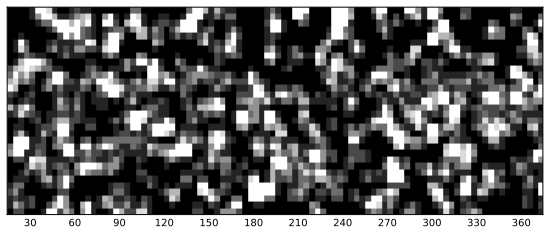

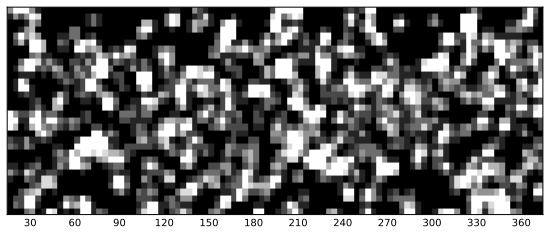

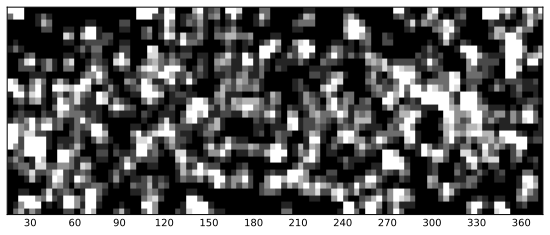

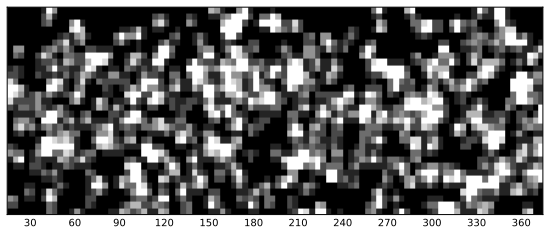

In [62]:
for pattern,name in [(trans_imgs_for,'trans_for'),
                     (trans_imgs_back,'trans_back'),
                     (trans_imgs_up,'trans_up'),
                     (trans_imgs_down,'trans_down')]: 
    roll_imgs = pattern
    fig = figure(figsize = (9.6,3.6))
    img_ref = imshow(squeeze(roll_imgs[:,:,0]),interpolation = 'nearest',aspect='auto',
                     cmap = cm.gray,vmin =0,vmax = 7,extent = [0+15,360+15,0,36])

    gca().tick_params(which  = 'both',
                      tick1On=False,
                      tick2On=False,
                      labelleft = False)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator   = MultipleLocator(30)
    majorFormatter = FormatStrFormatter('%d')
    #minorLocator   = MultipleLocator(5)
    gca().xaxis.set_major_locator(majorLocator)
    gca().xaxis.set_major_formatter(majorFormatter)

    pos = 0
    t0 = 0

    frames = np.arange(0,17,1/33.0)
    lookup = mod((frames*frame_rate),shape(roll_imgs)[2]).astype(int)
    lookup *= ((frames > 7) & (frames <10))
    lookup[(frames>=10)] = lookup[(frames < 10)][-1]

    fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
    #lookup = hstack((zeros(int(7/move_period)),ones(int(3/move_period)),zeros(int(7/move_period))))

    def update_fig(t):
        #print t
        pos = lookup[where(frames<t)[0][-1]]
        #print (t,pos)#where(frames<t)[0][-1]
        frame = np.squeeze(roll_imgs[:,:,pos])
        img_ref.set_data(frame)

    from matplotlib.animation import FFMpegWriter 
    Writer = FFMpegWriter 
    import matplotlib.animation as animation
    writer = Writer( metadata=dict(artist='Thad Lindsay'), bitrate=3600,fps = 33)
    ani = animation.FuncAnimation(fig, update_fig, frames=frames[1:], blit=False)
    print pole
    ani.save('trans_%s.mp4'%(name), writer=writer)

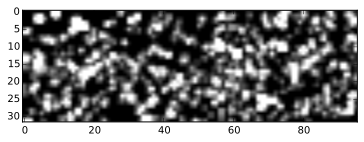

In [63]:
reload(acld)
from scipy import io
frame_rate = 60.0 
acld.display_shape = (96,32)
deg_per_pix = 360/acld.display_shape[0]
translation_velocity = 0.3 #2.25*frame_rate
#equator_pole = deg2rad(90)
forward_trans_pole = np.deg2rad(90)
backward_trans_pole = np.deg2rad(270)
upward_trans_pole = np.deg2rad(90)
downward_trans_pole = np.deg2rad(270)
bit_depth = 3
step_duration = 3
static_duration = 10
step_frames = step_duration*frame_rate
static_frames = static_duration*frame_rate
base_angular_velocity = (2*np.pi)/4 #1/4 rev/sec

#def add_stripe(img_mat):
#    nx = shape(img_mat)[2]
#    for xidx in range(nx-4):
#        img_mat[:,xidx:xidx+4,xidx,0] = 0
#    for xidx in range(0,4):
#        img_mat[:,-1-xidx:,95-xidx,0] = 0
#        img_mat[:,0:3-xidx,95-xidx,0] = 0
#    return img_mat

##################yaw
for i in [1]:
    for rep in range(1):
        yaw_imgs_90 = acld.make_spin_pattern_coromeridian(np.pi/2,
                                    base_angular_velocity*i,
                                    frame_rate,
                                    max_sensory_radius = 3.0,
                                    star_density = 8)
        yaw_imgs_90 = acld.adjust_depth(yaw_imgs_90)
        yaw_imgs_90 = yaw_imgs_90[:,:,:-1]
        #yaw_imgs_90 = np.dstack([yaw_imgs_90]*i)
        #yaw_imgs_90 = np.dstack([yaw_imgs_90[:,:,0:step_frames:1],yaw_imgs_90[:,:,step_frames:0:-1]])
    
        #static = zeros_like(yaw_imgs_90[:,:,:static_frames]) 
        #static[:,:,:] = yaw_imgs_90[:,:,0][:,:,np.newaxis]
        #yaw_imgs_90 = np.dstack([static,yaw_imgs_90])
        
        yaw_imgs_90 = yaw_imgs_90[:,:,:,np.newaxis]
        ################
        yaw_imgs_270 = acld.make_spin_pattern_coromeridian(np.pi/2*-1,
                                    base_angular_velocity*i,
                                    frame_rate,
                                    max_sensory_radius = 3.0,
                                    star_density = 8)
        yaw_imgs_270 = acld.adjust_depth(yaw_imgs_270)
        yaw_imgs_270 = yaw_imgs_270[:,:,:-1]
        #yaw_imgs_270 = np.dstack([yaw_imgs_270]*i)
        #yaw_imgs_270 = np.dstack([yaw_imgs_270[:,:,0:step_frames:1],yaw_imgs_270[:,:,step_frames:0:-1]])
    
        #static = zeros_like(yaw_imgs_270[:,:,:static_frames]) 
        #static[:,:,:] = yaw_imgs_270[:,:,0][:,:,np.newaxis]
        #yaw_imgs_270 = np.dstack([static,yaw_imgs_270])
        
        yaw_imgs_270 = yaw_imgs_270[:,:,:,np.newaxis]

330
330


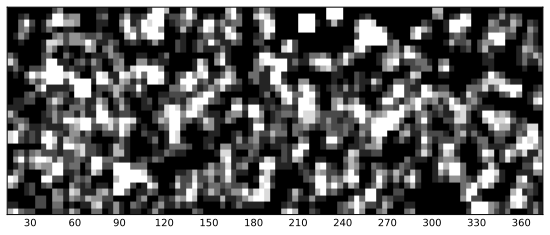

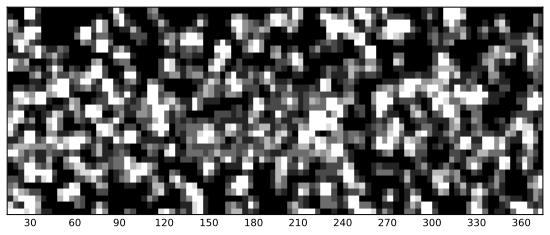

In [64]:
for pattern,name in [(yaw_imgs_90,'yaw_90'),
                     (yaw_imgs_270,'yaw_270')]: 
    roll_imgs = pattern
    fig = figure(figsize = (9.6,3.6))
    img_ref = imshow(squeeze(roll_imgs[:,:,0]),interpolation = 'nearest',aspect='auto',
                     cmap = cm.gray,vmin =0,vmax = 7,extent = [0+15,360+15,0,36])

    gca().tick_params(which  = 'both',
                      tick1On=False,
                      tick2On=False,
                      labelleft = False)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator   = MultipleLocator(30)
    majorFormatter = FormatStrFormatter('%d')
    #minorLocator   = MultipleLocator(5)
    gca().xaxis.set_major_locator(majorLocator)
    gca().xaxis.set_major_formatter(majorFormatter)

    pos = 0
    t0 = 0

    frames = np.arange(0,17,1/33.0)
    lookup = mod((frames*frame_rate),shape(roll_imgs)[2]).astype(int)
    lookup *= ((frames > 7) & (frames <10))
    lookup[(frames>=10)] = lookup[(frames < 10)][-1]

    fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
    #lookup = hstack((zeros(int(7/move_period)),ones(int(3/move_period)),zeros(int(7/move_period))))

    def update_fig(t):
        #print t
        pos = lookup[where(frames<t)[0][-1]]
        #print (t,pos)#where(frames<t)[0][-1]
        frame = np.squeeze(roll_imgs[:,:,pos])
        img_ref.set_data(frame)

    from matplotlib.animation import FFMpegWriter 
    Writer = FFMpegWriter 
    import matplotlib.animation as animation
    writer = Writer( metadata=dict(artist='Thad Lindsay'), bitrate=3600,fps = 33)
    ani = animation.FuncAnimation(fig, update_fig, frames=frames[1:], blit=False)
    print pole
    ani.save('yaw_%s.mp4'%(name), writer=writer)

In [94]:
t= 9.1
lookup[where(frames<t)[0][-1]]

54

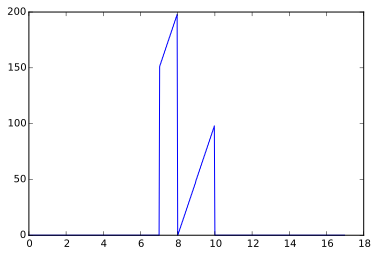

In [100]:
plot(frames,lookup)

In [101]:
shape(roll_imgs)

(32, 96, 200, 1)